In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# для разделения df на train и test выборку
from sklearn.model_selection import train_test_split

# для подготовки данных
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# перекрестная проверка модели
from sklearn.model_selection import cross_val_score

# # модели
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import svm #импортируем нашу модель

from sklearn.model_selection import validation_curve # для исследования модели
from sklearn.model_selection import StratifiedKFold # для стратифицированной выборки
from sklearn.model_selection import RandomizedSearchCV #импортирует случайный поиск гиперпараметров
from sklearn.model_selection import GridSearchCV # полный перебор гиперпараметров
from sklearn import metrics # импортируем метрики
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve

In [8]:
df = pd.read_csv('datasets/dataset_Facebook.csv')

In [9]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [10]:
df = df.dropna (subset=['Paid'])

In [11]:
# разделение выборки на тестовую и учебную
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("Paid", axis = 1)
y_train = train_set["Paid"].copy()

X_test = test_set.drop("Paid", axis = 1)
y_test = test_set["Paid"].copy()

X_full = df.drop("Paid", axis = 1)
y_full = df["Paid"].copy()

In [12]:
df_num = df.drop("Type", axis = 1)
df_num = df_num.drop("Paid", axis = 1)

In [13]:
# обработка данных перед обучением

# вставка отсутсвующих значений и маштабирование
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

num_attribs = list(df_num)
cat_attribs = ["Type"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

X_train_prepared = preprocess_pipeline.fit_transform(X_train[num_attribs + cat_attribs])
X_test_prepared = preprocess_pipeline.fit_transform(X_test[num_attribs + cat_attribs])
X_full_prepared = preprocess_pipeline.fit_transform(X_full[num_attribs + cat_attribs])

/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
y = df.Paid
df_preproc = df.drop("Paid", axis = 1)
df_preproc.loc[:, 'Type'] = df.loc[:, 'Type'].replace({'Photo': 0, 'Status': 1, 'Link': 2, 'Video': 3, np.NaN: 4})
imputer = SimpleImputer(strategy="median")
imputer.fit(df_preproc)
X = imputer.transform(df_preproc)
X = pd.DataFrame(X, columns= df_preproc.columns)

/var/folders/4b/wpq4f85s0lzcrjpl4chzpqpw0000gn/T/ipykernel_53953/908241098.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_preproc.loc[:, 'Type'] = df.loc[:, 'Type'].replace({'Photo': 0, 'Status': 1, 'Link': 2, 'Video': 3, np.NaN: 4})


In [20]:

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_prepared, y_train)
predict = RF_clf.predict(X_test_prepared)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.18181818181818182
recall 0.10526315789473684
accuracy 0.74
f1 0.13333333333333333


In [21]:

RF_clf01 = RandomForestClassifier() # увеличим количество деревье в случайном лесе.
RF_clf01.fit(X_train_prepared, y_train)
predict = RF_clf01.predict(X_test_prepared)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.2222222222222222
recall 0.10526315789473684
accuracy 0.76
f1 0.14285714285714285


In [24]:

predict_proba = RF_clf.predict_proba(X_test_prepared)
predict_proba

array([[0.46, 0.54],
       [0.41, 0.59],
       [0.57, 0.43],
       [0.64, 0.36],
       [0.62, 0.38],
       [0.87, 0.13],
       [0.39, 0.61],
       [0.72, 0.28],
       [0.63, 0.37],
       [0.85, 0.15],
       [0.75, 0.25],
       [0.66, 0.34],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       [0.73, 0.27],
       [0.35, 0.65],
       [0.6 , 0.4 ],
       [0.79, 0.21],
       [0.59, 0.41],
       [0.72, 0.28],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.64, 0.36],
       [0.36, 0.64],
       [0.75, 0.25],
       [0.72, 0.28],
       [0.53, 0.47],
       [0.48, 0.52],
       [0.67, 0.33],
       [0.26, 0.74],
       [0.74, 0.26],
       [0.94, 0.06],
       [0.58, 0.42],
       [0.86, 0.14],
       [0.5 , 0.5 ],
       [0.68, 0.32],
       [0.57, 0.43],
       [0.6 , 0.4 ],
       [0.66, 0.34],
       [0.73, 0.27],
       [0.66, 0.34],
       [0.71, 0.29],
       [0.66, 0.34],
       [0.58, 0.42],
       [0.9 , 0.1 ],
       [0.88, 0.12],
       [0.67, 0.33],
       [0.81,

(-0.01, 1.01)

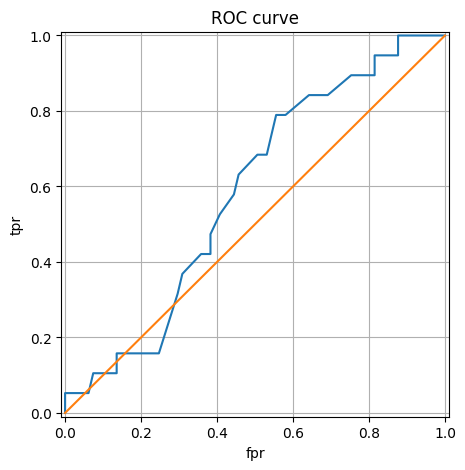

In [26]:
# сгенерируем массив, который состоит из случайных значений от 0 до 1, длиной как predict_proba
import random
tmp = [
    random.random()
    for _ in range (len(predict_proba[:1]))
]
%matplotlib inline

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [27]:
roc_auc_score(y_test, predict_proba[:,1]) #значение метрики ROC AUC

0.5841455490578298

In [29]:
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    X_full_prepared,
    y_full,
    scoring='roc_auc',
    cv=10
)

array([0.78769841, 0.60615079, 0.51488095, 0.34424603, 0.25793651,
       0.56746032, 0.2390873 , 0.36965812, 0.33974359, 0.34183673])

In [30]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.0 MB/s eta 0:00:0000:0100:010m


In [31]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_prepared, label=y_train)
dtest = xgb.DMatrix(X_test_prepared, label=y_test)

In [32]:
param = {
    'max_depth': 3,
    'eta': 0.3,
    'silent': 1,
    'objective': 'multi:softprob',
    'num_class': 3}
num_round = 20

In [33]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[18:12:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [34]:
best_preds = np.asarray([np.argmax(line) for line in preds])
precision_score(y_test, best_preds, average='macro')

0.5975485188968335